# OpenCV ML 

- Intro Machine Learning
- Intro OpenCV ML
- Intro SVM Algorithm
- SVM on OpenCV ML For OCR


##  Intro Machine Learning
- The study of computer algorithms that improve automatically through experience.[1][2]
- It is seen as a subset of **artificial intelligence**. 
- Machine learning algorithms build a **mathematical model** based on **sample data**, known as "training data".
- Machine learning is closely related to **computational statistics**, which focuses on making predictions using computers. 

> *Machine learning provides systems the ability to **automatically learn** and **improve from experience** without being **explicitly programmed**.*

![](resource/machine_learning.png)

### Dataset
- In the case of tabular data, a data set corresponds to one or more database **tables**, where every **column** of a table represents a particular **variable/fature**, and each row corresponds to a **instance** data. <br>
- Tabular dataset : <br>
<img src="resource/text_dataset.png" style="width:400px"></img><br>
- Image Dataset :<br>
<img src="resource/image_dataset.png" style="width:500px"></img><br><br><br>
- Dataset Proportion :<br>
<img src="resource/dataset_proportion.jpeg" style="width:500px"></img>
    - **Training set** : is used in training phase,
    - **Validation set** : is used for validationg model during training, for example Cross Validation.
    - **Test set** : is used in testing phase (sftertraining model finish).
- Common portion :
    - Trainig set : 50%
    - Validation set : 25%
    - Test set : 25%


### Machine Learning Algorithm
<img src="resource/ml_algorithm.png" style="width:500px"></img>

### Supervised Machine Learning
- **Classification**: Relates to **categorical data output**, such as whether it is red or not, whether the weather is sunny or cloudy, healthy or sick.
- **Regression**: Relates to **continuous data output**, such as length, weight, velocity
<img src="resource/supervised_learning.png" style="width:500px"></img>
- Algorithm :
    - Support Vector Machine (SVM)
    - Linear Regression
    - Logistic Regression
    - Naive Bayes
    - Linear Discriminant Analysis (LDA)
    - Decision Tree
    - K-nearest Neighbor
    - Neural Network (Multilayer Perceptron)
    - Similarity Learning
    - Etc.


___
## Intro OpenCV ML 
- Main Doc : https://docs.opencv.org/master/dc/dd6/ml_intro.html
- List of Machine Learning Algorithm on OpenCV ML :
    - Normal Bayes Classifier
    - K-Nearest Neighbors (KNN)
    - Support Vector Machines (SVM)
    - Decision Trees
    - Variable Importance
    - Boosting
    - Random Trees
    - Expectation Maximization
    - Neural Networks
    - Logistic Regression

### Support Vector Machines
- Are supervised learning models with associated learning algorithms that analyze data used for **classification** and **regression analysis**.
- Support Vector Machines is a **discriminative classifier** formally defined by a **separating hyperplane**. In other words, given labeled training data (supervised learning), the algorithm outputs an **optimal hyperplane** which categorizes new examples.
- Developed at AT&T Bell Laboratories by Vapnik with colleagues (Boser et al., 1992, Guyon et al., 1993, Vapnik et al., 1997).
- One of the most robust prediction methods, based on the statistical learning framework or VC theory proposed by Vapnik and Chervonenkis (1974) and Vapnik (1982, 1995).

#### Linearly Separable Data
- H1 does not separate the classes. 
- H2 does, but only with a small margin. 
- H3 separates them with the **maximal margin**.<br>

<img src="resource/lineary_sparable.png" style="width:250px"></img>

- **Maximum-margin hyperplane** and **margins** for an SVM trained with samples from two classes. 
- Samples on the margin are called the **support vectors**. <br>
<img src="resource/SVM_margin.png" style="width:250px"></img>
- Multiclass Dataset :<br>
<img src="resource/multicalss_svm.png" style="width:500px"></img>


## SVM using OpenCV ML

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os

- setup dataset
    - x_train : input data (4 samples , 2 feature data )
    - y_train : output data

In [78]:
x_train = np.array([[8, 8], 
                    [2, 8], 
                    [8, 2], 
                    [2, 2]], dtype=np.float32)

y_train = np.array([ 1, 
                     0, 
                     0, 
                     2])

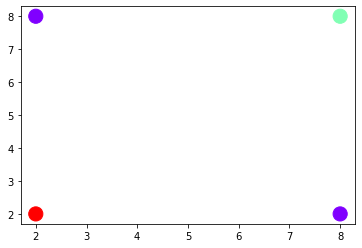

In [79]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=200, cmap='rainbow')

- Load SVM Model from OpenCV ML

In [100]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1000))

- `cv.ml.SVM_create()` : create empty model SVM
- method `.setType(svm_type)` :
- where `svm_type` :
    - `cv2.ml.SVM_C_SVC` : C-Support Vector Classification. n-class classification (n ≥ 2), allows imperfect separation of classes.
    - `cv2.ml.SVM_NU_SVC` : ν-Support Vector Classification. n-class classification with possible imperfect separation. Parameter ν (0..1).
    - `cv2.ml.SVM_ONE_CLASS` : Distribution Estimation (One-class SVM). 
    - `cv2.ml.SVM_EPS_SVR` : ϵ-Support Vector Regression. 
    - `cv2.ml.SVM_NU_SVR` : ν-Support Vector Regression. 
- method `.setKernel(kernel_type)` :
- where `kernel_type` :
    - `cv2.ml.SVM_CUSTOM` : Custom kernel
    - `cv2.ml.SVM_LINEAR` : Linear kernel, It is the fastest option
    - `cv2.ml.SVM_POLY` : Polynomial kernel
    - `cv2.ml.SVM_RBF` : Radial basis function (RBF), a good choice in most cases
    - `cv2.ml.SVM_SIGMOID` : Sigmoid kerne
    - `cv2.ml.SVM_CHI2` : Exponential Chi2 kernel, similar to the RBF kernel
    - `cv2.ml.SVM_INTER` : Histogram intersection kernel. A fast kernel
- method `.setTermCriteria(criteria_type, maxCount, epsilon)` :
- where `criteria_type` :
    - `cv2.TERM_CRITERIA_COUNT` : the maximum number of iterations or elements to compute
    - `cv2.TERM_CRITERIA_MAX_ITER` 
    - `cv2.TERM_CRITERIA_EPS` : the desired accuracy or change in parameters at which the iterative algorithm stops

- The value of **epsilon** defines a **margin** of tolerance where no penalty is given to errors
- The larger **epsilon** is the larger errors 

![](resource/epsilon_svmjpg.jpg)

- Train SVM

In [101]:
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

- predict result

In [102]:
width = 10
height = 10

plot_x = []
plot_y = []
for i in range(width):
    for j in range(height):
        y = svm.predict(np.array([[i,j]], dtype=np.float32))[1]
        plot_y.append(y)
        plot_x.append([i,j])

In [103]:
plot_x = np.array(plot_x)
plot_y = np.array(plot_y, dtype=np.float32)

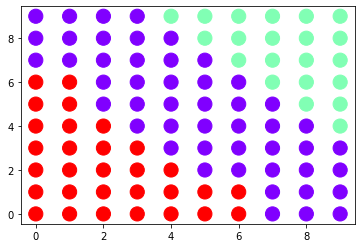

In [104]:
plt.scatter(plot_x[:, 0], plot_x[:, 1], c=plot_y, s=200, cmap='rainbow')

___

# OpenCV ML SVM for OCR

- Install library **Scikit-Learn** : <br>
`conda install scikit-learn`

In [ ]:
!conda install scikit-learn

### Image Augmentation 
- Image augmentation is one useful technique that can **increase** the size of the **training set**, **without** acquiring **new images**.

In [2]:
def img_augmentation(img):
    kernel = np.ones((3,3),np.uint8)
    kernel2D = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    h, w = img.shape
    center = (w // 2, h // 2)
    M05a = cv2.getRotationMatrix2D(center, 5, 1.0)
    M05b = cv2.getRotationMatrix2D(center, -5, 1.0)
    Mr = np.float32([[1, 0, 2], [0, 1, 0]])
    Ml = np.float32([[1, 0, -2], [0, 1, 0]])
    Mr3 = np.float32([[1, 0, 3], [0, 1, 0]])
    Ml3 = np.float32([[1, 0, -3], [0, 1, 0]])
    
    img_blur = cv2.GaussianBlur(img,(3,3),0)
    img_closing = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    img_erode = cv2.erode(img, kernel)
    img_tr_r = cv2.warpAffine(img, Mr, (w, h), borderValue=(255,255,255))
    img_tr_l = cv2.warpAffine(img, Ml, (w, h), borderValue=(255,255,255))
    img_tr_r3 = cv2.warpAffine(img, Mr3, (w, h), borderValue=(255,255,255))
    img_tr_l3 = cv2.warpAffine(img, Ml3, (w, h), borderValue=(255,255,255))
    img_rot5a = cv2.warpAffine(img, M05a, (w, h), borderValue=(255,255,255))
    img_rot5b = cv2.warpAffine(img, M05b, (w, h), borderValue=(255,255,255))
    
    return[img, img_blur, img_closing, img_erode, img_rot5a, img_rot5b, img_tr_r, img_tr_l, img_tr_r3, img_tr_l3]

In [3]:
img = cv2.imread("char_dataset/0/0_0.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
imgs = img_augmentation(gray)

In [5]:
len(imgs)

10

In [6]:
for i, img in enumerate(imgs):
    cv2.imshow("char augmented - %d" % i, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Deskewing & HOG

- HOG :
    - **Feature Descriptor** is a representation of an image or an image patch that simplifies the image by extracting **useful information**.
    - Typically, a feature descriptor converts an image of size width x height x 3 (channels ) to a **feature vector** / **array** of length `n`.
    - Where `n` could be **width x height x channel** on original image.
    - The **feature vector** produced by **HOG algorithms** when fed into an image classification algorithms like Support Vector Machine (SVM) **produce good results**.
- HOG Algorithm :
     - Calculate the Gradient Images :
         - Sobel Operator (`cv2.Sobel()`): Using the sobel operation, you can detect the edges of an image in both horizontal and vertical directions 
     - Find the magnitude ($g$) and direction ($\theta$) of gradient :
         - Using `cv2.cartToPolar(x,y)` : transform cartesian to polar image.

In [5]:
SZ=20
bin_n = 16

affine_flags = cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR

def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img,M,(SZ, SZ),flags=affine_flags)
    return img


def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)

    # quantizing binvalues in (0...16)
    bins = np.int32(bin_n*ang/(2*np.pi))   
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)   
    return hist

- Deskewing (deskew the image using its second order moments)

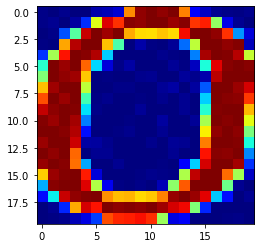

In [6]:
img = cv2.imread("char_dataset/0/0_8.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

# h, w= gray.shape
# center = (w // 2, h // 2)
# M = cv2.getRotationMatrix2D(center, -10, 1.0)
# gray_rot = cv2.warpAffine(gray, M, (w, h), borderValue=(180,180,180))

plt.imshow(gray, cmap="jet")

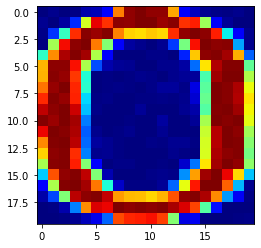

In [10]:
deskew_img = deskew(gray)

plt.imshow(deskew_img, cmap="jet")

- HOG

In [11]:
hog_img = hog(deskew_img)

In [12]:
hog_img.shape

(64,)

In [13]:
hog_img

array([2.62988438e+03, 2.86358883e+03, 6.26424395e+03, 1.66127856e+03,
       1.97800003e+03, 4.86023254e+01, 7.61449051e+01, 1.59145849e+03,
       6.38178850e+03, 5.67667695e+03, 2.60054466e+03, 3.23240637e+03,
       1.56323627e+03, 7.21110249e+00, 0.00000000e+00, 0.00000000e+00,
       1.91400000e+03, 1.43716314e+01, 5.83095169e+00, 1.45003448e+02,
       5.35135443e+03, 2.19399243e+03, 5.62150232e+03, 2.39565266e+03,
       5.73361590e+03, 0.00000000e+00, 1.58134279e+01, 0.00000000e+00,
       4.49572542e+03, 4.87648077e+03, 2.76440298e+03, 1.10934386e+03,
       3.54483767e+03, 5.93632851e+01, 2.18284431e+01, 0.00000000e+00,
       3.37499155e+03, 5.72409866e+03, 3.60894306e+03, 2.18881607e+03,
       2.05129822e+03, 0.00000000e+00, 4.47213602e+00, 1.50905510e+03,
       3.23600796e+03, 2.68573018e+03, 5.47980527e+03, 4.43947574e+03,
       7.80985947e+03, 4.73584986e+03, 2.79212537e+03, 4.22227502e+03,
       1.91133835e+02, 0.00000000e+00, 1.06898578e+02, 0.00000000e+00,
      

- Load Dataset

In [7]:
dataset = "char_dataset"

label = []
for folder in os.listdir(dataset):
    label.append(folder)
print("Label" , label)
print("Number of Class ", len(label))

Label ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z']
Number of Class  33


In [10]:
image_vec = []
target_data = []
for folder in os.listdir(dataset):
    for filename in os.listdir(dataset + "/" + folder)[:10]:
        if filename.find('.jpg') < 0 :
            continue
        img = cv2.imread(dataset + "/" + folder + "/" + filename, 0)
        for img in img_augmentation(img):
            img_hog = hog(deskew(img))
            image_vec.append(img_hog)
            idx = label.index(folder)
            target_data.append(idx)

In [11]:
len(image_vec)

3300

- convert data to numpy array

In [24]:
image_vec[0].shape

(64,)

In [28]:
image_vec[0].reshape(-1,64)

array([[2532.77904129,  744.54157066, 1225.74232483, 1477.24723053,
         928.63114738,   27.45906067,  176.26591301, 1375.43793488,
        1083.20093918,  831.21136093, 1127.39437866,  912.72621155,
         597.04537582,   93.60606003,  100.4527626 , 2859.9622612 ,
         490.20797443,   58.26263857,   33.83262348,    0.        ,
        1382.64667511, 1647.45052528,  936.05151367, 1784.80713463,
        1460.21943283,    0.        ,    0.        ,    0.        ,
        1467.8324585 , 1662.7539978 ,  427.34215927, 4998.39193916,
        1259.57369995,   38.31312418,    0.        ,  395.72781372,
        2237.19699478,  902.21229553,  794.69458866, 4028.88600349,
        1247.97488022,   17.49285698,   10.29563046,    0.        ,
        1200.51207161, 1496.30653381,  822.62758923, 1021.60772753,
        1440.69600058,  435.07816505, 1933.03538227, 1113.32161713,
         916.00000191,    0.        ,   14.76482391, 4491.79275703,
         980.46135807,  831.78697968, 1361.09837

In [12]:
x = np.float32(image_vec).reshape(-1,64)
y = np.array(target_data)

x.shape, y.shape

((3300, 64), (3300,))

- Split Dataset

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1650, 64), (1650, 64), (1650,), (1650,))

- Train Model

In [14]:
# setup SVM model
svm = cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

In [15]:
# do train
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

- Save model

In [16]:
svm.save('svm_data.dat')

- Apply Prediction for test dataset

In [17]:
y_predict = svm.predict(x_test)[1]

- Evaluate Test Result

In [18]:
mask = y_predict.T[0]==y_test
correct = np.count_nonzero(mask)
accuracy = correct*100.0/y_predict.size
print("accuracy : %.2f" % accuracy)

accuracy : 98.36


- Evaluate using **Scikit-Learn**

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, target_names=label))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        49
           1       0.98      0.96      0.97        52
           2       1.00      0.98      0.99        58
           3       1.00      1.00      1.00        47
           4       0.93      0.98      0.96        55
           5       1.00      1.00      1.00        55
           6       0.98      1.00      0.99        49
           7       1.00      1.00      1.00        45
           8       1.00      0.98      0.99        52
           9       1.00      1.00      1.00        44
           A       0.98      0.95      0.96        57
           B       0.98      1.00      0.99        45
           C       1.00      0.96      0.98        52
           D       0.89      0.98      0.93        50
           E       1.00      1.00      1.00        57
           F       1.00      1.00      1.00        51
           G       1.00      1.00      1.00        50
           H       1.00    

<img src="resource/prec_rec_2.png" style="width:700px"></img>

___

## Compare Train Result SVM Model Using Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [21]:
param_grid = {'C': [2.67],
              'gamma': [5.383], }
clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid)
clf = clf.fit(x_train, y_train)

In [22]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        49
           1       0.98      0.96      0.97        52
           2       1.00      0.98      0.99        58
           3       1.00      1.00      1.00        47
           4       0.93      0.98      0.96        55
           5       1.00      1.00      1.00        55
           6       0.98      1.00      0.99        49
           7       1.00      1.00      1.00        45
           8       1.00      0.98      0.99        52
           9       1.00      1.00      1.00        44
           A       0.98      0.95      0.96        57
           B       0.98      1.00      0.99        45
           C       1.00      0.96      0.98        52
           D       0.89      0.98      0.93        50
           E       1.00      1.00      1.00        57
           F       1.00      1.00      1.00        51
           G       1.00      1.00      1.00        50
           H       1.00    

___

# Apply Model to Plate Number

In [23]:
def drawPred(frame, label, left, top, right, bottom):
    cv2.rectangle(frame, (left, top), (right, bottom), (255, 0, 255), 2)

    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), 
                         (max(right, left + labelSize[0]), top + baseLine), (255, 0, 255), -1)
    
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.50, (255, 255, 255), 1)
    return frame

In [48]:
def preprocessing(img, h1, h2):
    # get roi & resize 
    h, w, c = img.shape
    y1, y2, x1, x2 = int(h1), int(h2), int(w*0.30), int(w*0.70)
    roi = img[y1:y2, x1:x2]
    scale = 300/roi.shape[0]
    roi = cv2.resize(roi, (0,0), fx=scale, fy=scale)
    
    #convert to gray -> binary
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    __, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh, roi, [x1, y1, x2, y2], scale
    
def get_contours(thresh):
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h, w, c = img.shape
    size = h*w
    contours = [cc for i, cc in enumerate(contours) if contour_char_OK(cc, size)]
    return contours

def contour_char_OK(cc, size=1000000):
    x, y, w, h = cv2.boundingRect(cc)
    area = cv2.contourArea(cc)
    
    if w < 3 or h < 5 or area < 120: 
        return False
    
    validDimentson = w/h > 0.11 and w/h < 0.78
    varidAreaRatio = area/(w*h)  > 0.17
    return validDimentson and varidAreaRatio

def sort_contours(contours, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(cnt) for cnt in contours]
    
    cnts, boundingBoxes = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))
    return cnts, boundingBoxes

In [49]:
def crop_plate(thresh, contours):
    rects = []
    for i, cnt in enumerate(contours) :
        rect = cv2.boundingRect(cnt)
        rects.append(rect)

    rects = np.array(rects)

    if len(rects) < 4 :
        return False, thresh, []
    rects = similar_rect(rects, row=3, n=2) #similar rect for closest `h` (row 3)

    if len(rects) < 4 :
        return False, thresh, []
    rects = similar_rect(rects, row=2, n=2) #similar rect for closest `w` (row 2)

    if len(rects) < 4 :
        return False, thresh, []
    x1 = rects[:, 0].min()
    x2 = rects[:, 0].max() + rects[:, 2].max()
    y1 = rects[:, 1].min()
    y2 = rects[:, 1].max() + rects[:, 3].max()
    plate_number = thresh[y1:y2, x1:x2]
    return True, plate_number, [x1, y1, x2, y2]

def similar_rect(rects, row=3, n=2):
    mean = np.mean(rects[:, row])
    std = np.std(rects[:, row])
    rects = np.array([rect for rect in rects if abs(rect[row] - mean) < n*std and rect_ok(rect)])
    return rects

def rect_ok(rect):
    x, y, w, h = rect
    return w/h > 0.11 and w/h < 0.7

In [50]:
img = cv2.imread("plat-nomor-7.jpg")

h, w, c = img.shape
thresh, roi, roi_rect, s = preprocessing(img, h1=0.5*h, h2=0.85*h )

contours = get_contours(thresh)

is_plate, plate_img, plate_rect = crop_plate(thresh, contours)

# pts = find_4_coord(contours)
# plate_img = transform(plate_img, pts)

chars = []
if is_plate :
    x1, y1, x2, y2 = plate_rect
    x1_, y1_, x2_, y2_ = roi_rect
    left = int(x1/s) + x1_
    top = int(y1/s) + y1_
    right = int(x2/s) + x1_
    bottom = int(y2/s) + y1_
    plate_img_rgb = roi[y1:y2, x1:x2] # get image license plate
    
    contours = get_contours(plate_img)
    if len(contours) > 1:
        contours, __ = sort_contours(contours) 
        for i, cnt in enumerate(contours) :
            x, y, w, h = cv2.boundingRect(cnt) # get bounding box each character
            
            char = plate_img_rgb[y:y+h, x:x+w]
            char_grey = cv2.cvtColor(char, cv2.COLOR_BGR2GRAY)
            char_inv = cv2.bitwise_not(char_grey)
            cv2.imshow("char_inv - %d" % i, char_inv)
            char_inv = cv2.resize(char_inv, (20,20))

            char_hog = hog(deskew(char_inv))
            chars.append(char_hog)
            
        chars = np.float32(chars).reshape(-1, 64)
        result = svm.predict(chars)[1].T[0]
        print("result", result)
        text_result = [label[int(idx)] for idx in result]
        print("text_result", text_result)
        img = drawPred(img, ''.join(text_result), left, top - 5, right, bottom)

cv2.imshow("plate img", plate_img_rgb)
cv2.imshow("car img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

result [ 1.  6.  1.  6. 28. 10. 14.]
text_result ['1', '6', '1', '6', 'U', 'A', 'E']


- Geometric Correction

In [ ]:
def find_4_coord(contours):
    perimeter = []
    for cc in contours:
        perimeter = cv2.approxPolyDP(cc, 0.09 * cv2.arcLength(cc, True), True)
    return np.array(perimeter[:,0,:])
        
def order_points(pts):

    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def transform(img, pts):

    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    print(tl, tr, br, bl)

    for pt in rect.astype(np.uint16):
        cv2.circle(img, (pt[0], pt[1]), 4, (0,255,255), -1)

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth, 0],
        [maxWidth, maxHeight],
        [0, maxHeight]], dtype = "float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, M, (100, 150))
    return warped

### Task
- Deteksi Plat Nomor menggunakan Yolo + Recognize Character menggunakan SVM model

# Sumber 
- https://en.wikipedia.org/wiki/Machine_learning
- https://docs.opencv.org/master/dc/dd6/ml_intro.html
- https://docs.opencv.org/master/dd/d3b/tutorial_py_svm_opencv.html
- https://www.learnopencv.com/histogram-of-oriented-gradients/
- https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.cross_validation.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html